In [80]:
%reload_ext autoreload
%autoreload 2
from codedetails import *

## Data: newsgroup text as input data and newsgroup topic as target column

### Fetch newgroups for only two topics: atheism & christianity

In [81]:
# for this example, we need just two topics: alt.atheism, soc.religion.christianity
set_topics(['alt.atheism', 'soc.religion.christian'])

In [82]:
# Get 'train' & 'test' data for atheism and christianity categories
fetch_data()

convert_to_structured_data_form ()    

In [98]:
# Train, test the model and compute F1 score

train_model ()

compute_and_print_f1_score ()

F1 score of the model= 93.40 %


In [102]:
# Choose a random sample input 
idx = 80
print_test_sample (idx)

From: mayne@pipe.cs.fsu.edu (William Mayne)
Subject: Re: Christian Morality is
Organization: Florida State University Computer Science Department
Reply-To: mayne@cs.fsu.edu
Lines: 15

In article <1993Apr21.184959.9451@dcs.warwick.ac.uk> simon@dcs.warwick.ac.uk (Simon Clippingdale) writes:
>
>Dan, I'm concerned that you are in grave spiritual danger because of your
>stubborn refusal to love and accept into your heart the Mighty Invisible
>Pink Unicorn...[Nice parody deleted.]

>I shall pray for you. In fact, brother, I cast out the demon which binds you
>in the Name of the Mighty Invisible Pink Unicorn. Dan, you must have *faith*!

Then you better pray for me, too, because I believe that the Mighty
Invisibile Pink Unicorn does not exist. One being cannot be both "Pink"
and "Invisible." The demon (or should that be daemon?) that keeps me
from believing and saving my soul is named Logic.

Bill Mayne



In [103]:
print_prediction_for_test_sample(idx)
print_actual_category(idx)

Model prediction:[atheism = 41.80 %, christian = 58.20 %]

Actual category: alt.atheism


# Use LIME to explain/test predictions

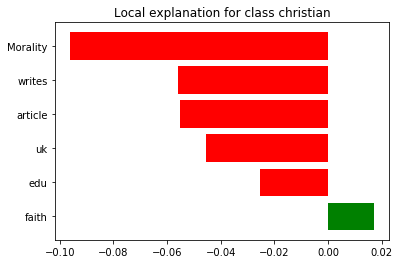

LIME explanations for the sample: 
[('Morality', -0.09625319717398802), ('writes', -0.0557605897572445), ('article', -0.05507899981205429), ('uk', -0.045603969586595405), ('edu', -0.02544131487985572), ('faith', 0.01716931675352415)]


In [104]:
find_lime_explanations_for (idx)

## Note that the words from the Header/footer/quote fields have also contributed to prediction of  category; it is a bug at data preprocessing stage !!


# Fixing the bug
### Lets omit Header, footer, quote fields and recompute everything

In [105]:
fetch_data (remove_included_fields=True)

convert_to_structured_data_form(fixed=True)

train_model(fixed=True)

print_test_sample (idx, fixed=True)



Then you better pray for me, too, because I believe that the Mighty
Invisibile Pink Unicorn does not exist. One being cannot be both "Pink"
and "Invisible." The demon (or should that be daemon?) that keeps me
from believing and saving my soul is named Logic.


In [106]:
print ("Before fixing: ")
compute_and_print_f1_score()
print ("After fixing: ")
compute_and_print_f1_score(fixed=True)

Before fixing: 
F1 score of the model= 93.40 %
After fixing: 
F1 score of the model= 81.02 %


In [25]:
# After removing spurious features, predicted probabilities (atheism, christian) by trained model
print ("Before fixing: ")
print_prediction_for_test_sample(idx)
print ("After fixing: ")
print_prediction_for_test_sample(idx, fixed=True)

print_actual_category(idx)

Before fixing: 
Model prediction:[atheism = 43.00 %, christian = 57.00 %]
After fixing: 
Model prediction:[atheism = 59.45 %, christian = 40.55 %]

Actual category: alt.atheism


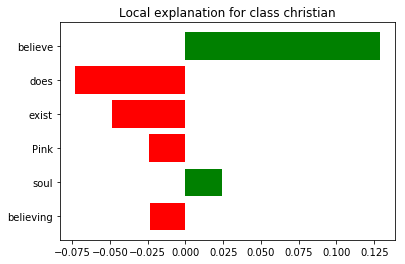

LIME explanations for the sample: 
[('believe', 0.128523633144979), ('does', -0.07304785365307646), ('exist', -0.04860770833586275), ('Pink', -0.024470454157002525), ('soul', 0.024318154218586584), ('believing', -0.023620096661855865)]


In [107]:
find_lime_explanations_for(idx, fixed=True)